# **Fuzzy C-Mean Clustering**

# **Dekritisasi menggunakan kameans clustering**
ambil sepal light saja hanya kolom sepal light

 id      class  sepal length (cm)
  1     setosa                5.1
  2     setosa                4.9
  3     setosa                4.7
  4     setosa                4.6
  5     setosa                5.0
  6     setosa                5.4
  7     setosa                4.6
  8     setosa                5.0
  9     setosa                4.4
 10     setosa                4.9
 11     setosa                5.4
 12     setosa                4.8
 13     setosa                4.8
 14     setosa                4.3
 15     setosa                5.8
 16     setosa                5.7
 17     setosa                5.4
 18     setosa                5.1
 19     setosa                5.7
 20     setosa                5.1
 21     setosa                5.4
 22     setosa                5.1
 23     setosa                4.6
 24     setosa                5.1
 25     setosa                4.8
 26     setosa                5.0
 27     setosa                5.0
 28     setosa                5.2
 29     setosa

<ipython-input-7-2507309177>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sepal_length['Cluster'] = labels_mapped


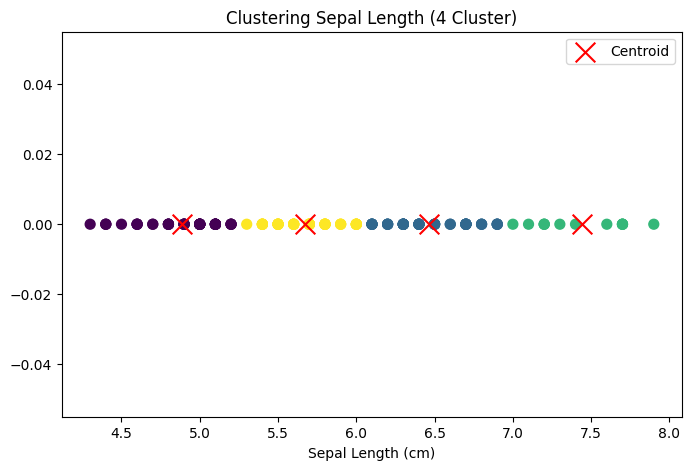

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Ambil data
df_iris = get_iris_data()

# Ambil hanya fitur sepal length
df_sepal_length = df_iris[['id', 'class', 'sepal length (cm)']]

# Cetak data sepal length tanpa indeks
print(df_sepal_length.to_string(index=False))

# Ambil nilai sepal length untuk clustering
X = df_sepal_length[['sepal length (cm)']].values

# Lakukan clustering KMeans dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

# Mapping label angka ke huruf
label_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
labels_mapped = pd.Series(labels).map(label_mapping)

# Tambahkan label cluster ke dataframe
df_sepal_length['Cluster'] = labels_mapped

print("\n📌 Hasil Clustering KMeans (4 Cluster) dengan Label Huruf:")
print(df_sepal_length.to_string(index=False))

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
plt.scatter(df_sepal_length['sepal length (cm)'], [0]*len(df_sepal_length), c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_, [0]*4, c='red', marker='x', s=200, label='Centroid')
plt.title('Clustering Sepal Length (4 Cluster)')
plt.xlabel('Sepal Length (cm)')
plt.legend()
plt.show()


lakukan 4 smuanya mendjadi 4 kategori


📌 Hasil Clustering Fuzzy C-Means (4 Cluster) dengan Label Kategori:
 id      class  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Cluster
  1     setosa                5.1               3.5                1.4               0.2       C
  2     setosa                4.9               3.0                1.4               0.2       B
  3     setosa                4.7               3.2                1.3               0.2       B
  4     setosa                4.6               3.1                1.5               0.2       B
  5     setosa                5.0               3.6                1.4               0.2       C
  6     setosa                5.4               3.9                1.7               0.4       C
  7     setosa                4.6               3.4                1.4               0.3       B
  8     setosa                5.0               3.4                1.5               0.2       B
  9     setosa                4.4               2.9       

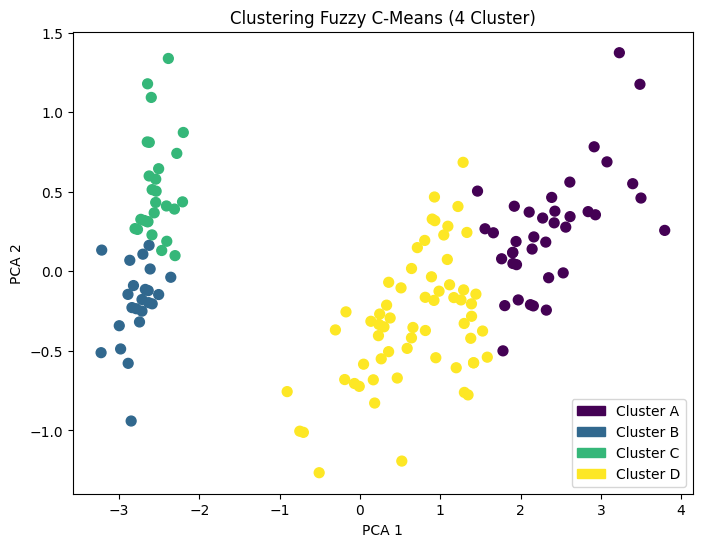

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Fungsi Fuzzy C-Means
def fuzzy_c_means(X, k, m, max_iter, epsilon):
    n = X.shape[0]  # Jumlah data
    d = X.shape[1]  # Jumlah fitur

    # Inisialisasi matriks keanggotaan acak
    U = np.random.dirichlet(np.ones(k), size=n)

    for iteration in range(max_iter):
        U_prev = U.copy()

        # Hitung pusat cluster
        centroids = (U ** m).T @ X / np.sum(U ** m, axis=0)[:, None]

        # Hitung jarak
        distances = np.zeros((n, k))
        for i in range(k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)

        # Update U
        for i in range(n):
            for j in range(k):
                if distances[i, j] == 0:
                    U[i, :] = 0
                    U[i, j] = 1
                else:
                    U[i, j] = 1.0 / np.sum((distances[i, j] / distances[i, :]) ** (2 / (m - 1)))

        # Cek konvergensi
        if np.linalg.norm(U - U_prev) < epsilon:
            break

    return centroids, U

# Ambil data
df_iris = get_iris_data()

# Ambil semua fitur
iris = load_iris()
X = iris.data

# Parameter FCM
k = 4                  # Jumlah cluster
m = 2.0                # Derajat fuzziness
max_iter = 100         # Maksimum iterasi
epsilon = 0.01         # Ambang batas konvergensi

# Jalankan FCM
centroids, U = fuzzy_c_means(X, k, m, max_iter, epsilon)

# Dapatkan label cluster dari keanggotaan maksimum
labels = np.argmax(U, axis=1)

# Mapping label numerik ke huruf
label_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
labels_huruf = [label_mapping[label] for label in labels]

# Tambahkan hasil cluster ke dataframe
df_iris['Cluster'] = labels_huruf

# Cetak hasil clustering
print("\n📌 Hasil Clustering Fuzzy C-Means (4 Cluster) dengan Label Kategori:")
print(df_iris.to_string(index=False))

# Visualisasi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Mapping label huruf ke warna
color_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
colors = [color_mapping[label] for label in labels_huruf]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='viridis', s=50)
plt.title('Clustering Fuzzy C-Means (4 Cluster)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Manual legend
from matplotlib.patches import Patch
legend_labels = [
    Patch(color=plt.cm.viridis(0/3), label='Cluster A'),
    Patch(color=plt.cm.viridis(1/3), label='Cluster B'),
    Patch(color=plt.cm.viridis(2/3), label='Cluster C'),
    Patch(color=plt.cm.viridis(3/3), label='Cluster D')
]
plt.legend(handles=legend_labels)
plt.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Hapus kolom duplikat jika ada
    df = df.loc[:, ~df.columns.duplicated()]

    return df

# Ambil data
df_iris = get_iris_data()

# Ubah setiap fitur menjadi kategori
features = load_iris().feature_names
for feature in features:
    # Buat 4 bin berdasarkan quartile
    df_iris[f'{feature}_kategori'] = pd.qcut(df_iris[feature], q=4, labels=['A', 'B', 'C', 'D'])

# Ambil hanya kolom id dan kolom kategori
kategori_columns = ['id'] + [f'{feature}_kategori' for feature in features]
df_kategori = df_iris[kategori_columns]

# Tampilkan hasil
print("\n📌 Data Iris Hasil Kategori (Tanpa Data Numerik dan Tanpa Kelas Iris):")
print(df_kategori.to_string(index=False))



📌 Data Iris Hasil Kategori (Tanpa Data Numerik dan Tanpa Kelas Iris):
 id sepal length (cm)_kategori sepal width (cm)_kategori petal length (cm)_kategori petal width (cm)_kategori
  1                          A                         D                          A                         A
  2                          A                         B                          A                         A
  3                          A                         C                          A                         A
  4                          A                         C                          A                         A
  5                          A                         D                          A                         A
  6                          B                         D                          B                         B
  7                          A                         D                          A                         A
  8                          A                   

## **Konsep dasar Fuzzy C-Mean Clustering**

Fuzzy C-Means (FCM) adalah salah satu metode clustering yang memungkinkan satu data menjadi anggota lebih dari satu cluster dengan derajat keanggotaan tertentu (nilai antara 0 dan 1). Berbeda dengan k-means yang bersifat hard clustering (anggota hanya milik satu cluster), FCM bersifat *soft clustering*.

 Berbeda dengan metode K-Means yang bersifat tegas, FCM memungkinkan fleksibilitas dalam menentukan klaster karena setiap data memiliki nilai keanggotaan terhadap semua klaster yang totalnya berjumlah 1.

 Tujuan utama dari algoritma ini adalah meminimalkan fungsi objektif yang mempertimbangkan jarak data terhadap pusat klaster dan tingkat keanggotaannya. Algoritma ini bekerja secara iteratif dengan menghitung pusat klaster dan memperbarui nilai keanggotaan hingga nilai-nilai tersebut stabil atau konvergen.

Keunggulan FCM terletak pada kemampuannya menangani data yang tidak memiliki batas klaster yang jelas, sehingga cocok untuk aplikasi dunia nyata seperti segmentasi citra atau analisis perilaku konsumen. Namun, algoritma ini juga memiliki kelemahan, seperti sensitif terhadap inisialisasi awal dan lambat saat digunakan pada data dalam jumlah besar. Selain itu, parameter fuzziness (biasanya disimbolkan dengan
𝑚
m) memengaruhi tingkat "kabur"-nya keanggotaan, dan harus ditentukan secara tepat agar hasil klasterisasi optimal.





## **Algoritma Fuzzy C-Mean Clustering**

Algoritma Fuzzy C-Means (FCM) adalah metode clustering yang menggunakan konsep fuzzy, di mana setiap data dapat menjadi anggota lebih dari satu cluster dengan derajat ketebalan yang berbeda, bernilai antara 0 sampai 1. Algoritma ini memungkinkan data memiliki keseluruhan parsial pada beberapa cluster, berbeda dengan metode clustering keras seperti K-Means yang hanya mengelompokkan data ke satu cluster saja.

### **Langkah-langkah Fuzzy C-Mean Clustering**

1. Menentukan jumlah cluster (c) yang diinginkan.
2. Inisialisasi matriks derajat keanggotaan (U) secara acak, di mana setiap baris mewakili data dan setiap kolom mewakili cluster. Nilai derajat keanggotaan tiap data pada semua cluster harus berjumlah 1.
3. Menghitung pusat cluster (centroid) menggunakan rumus rata-rata berbobot, di mana bobotnya adalah derajat pengumpulan data yang dipangkatkan dengan parameter fuzziness M>1.
4. Memperbarui derajat pengumpulan (U) berdasarkan jarak data ke pusat cluster yang baru dihitung, sehingga data yang lebih dekat ke pusat cluster memiliki derajat keanggotaan lebih tinggi.
5. Menghitung fungsi tujuan yang mengukur total jarak berbobot antara data dan pusat cluster. Fungsi ini diminimasi untuk mendapatkan hasil clustering terbaik.
6. Iterasi langkah 3 sampai 5 dilakukan sampai perubahan fungsi tujuan atau perubahan derajat pengumpulan lebih kecil dari nilai toleransi yang telah ditentukan, atau sampai mencapai jumlah iterasi maksimal.

**Fungsi Objektif Fuzzy C-Means**

$$
J_m = \sum_{i=1}^{n} \sum_{j=1}^{c} u_{ij}^m \cdot \|x_i - c_j\|^2
$$

**Keterangan:**

- \( J_m \) : Fungsi objektif yang diminimalkan  
- \( n \) : Jumlah data  
- \( c \) : Jumlah klaster  
- \( u_{ij} \) : Derajat keanggotaan data ke-\(i\) terhadap klaster ke-\(j\)  
- \( m \) : Parameter fuzziness (biasanya \( m = 2 \))  
- \( x_i \) : Data ke-\(i\)  
- \( c_j \) : Pusat klaster ke-\(j\)  
- \( \|x_i - c_j\| \) : Jarak antara data ke-\(i\) dan pusat klaster ke-\(j\) (biasanya Euclidean distance)

### **Update derajat keanggotaaan**

**Rumus Update Derajat Keanggotaan (Membership Update)**

$$
u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{\|x_i - c_j\|}{\|x_i - c_k\|} \right)^{\frac{2}{m - 1}}}
$$

**Keterangan:**



- \( u_{ij} \) : Derajat keanggotaan data ke-\(i\) terhadap klaster ke-\(j\)  
- \( c \) : Jumlah klaster  
- \( x_i \) : Data ke-\(i\)  
- \( c_j \) : Pusat klaster ke-\(j\)  
- \( \|x_i - c_j\| \) : Jarak antara data ke-\(i\) dan pusat klaster ke-\(j\)  
- \( m \) : Parameter fuzziness (biasanya \( m = 2 \))


### **Update pusat Cluster**

**Rumus Update Pusat Klaster**

$$
c_j = \frac{\sum_{i=1}^{n} u_{ij}^m \cdot x_i}{\sum_{i=1}^{n} u_{ij}^m}
$$

**Keterangan:**

- \( c_j \) : Pusat klaster ke-\(j\)  
- \( n \) : Jumlah data  
- \( u_{ij} \) : Derajat keanggotaan data ke-\(i\) terhadap klaster ke-\(j\)  
- \( m \) : Parameter fuzziness (biasanya \( m = 2 \))  
- \( x_i \) : Data ke-\(i\)

##  Fuzzy C-Means Clustering (Manual)

 📊 Data

| xi | x1 | x2 |
|----|----|----|
| 1  | 1  | 2  |
| 2  | 2  | 3  |
| 3  | 3  | 4  |
| 4  | 6  | 7  |
| 5  | 7  | 8  |

 🧮 Matriks Keanggotaan Awal (U)

| xi | \(\mu_{i1}\) (dc1) | \(\mu_{i2}\) (dc2) |
|----|------------------|------------------|
| 1  | 0.3              | 0.7              |
| 2  | 0.2              | 0.8              |
| 3  | 0.4              | 0.6              |
| 4  | 0.7              | 0.3              |
| 5  | 0.1              | 0.9              |

Dengan:  
- Jumlah data: \( n = 5 \)  
- Jumlah cluster: \( c = 2 \)  
- Fuzzifier: \( m = 2 \)  

---

 📐 Rumus Centroid

Centroid untuk cluster ke-\( j \) adalah:

$$
v_j = \frac{\sum_{i=1}^{n} \left( \mu_{ij} \right)^m x_i}{\sum_{i=1}^{n} \left( \mu_{ij} \right)^m}
$$

---

 🔢 Perhitungan Centroid Cluster 1 (\(v_1\))

 Langkah 1: Hitung $$( (\mu_{i1})^2 )$$

$$
\mu_{i1}^2 = \{0.3^2, 0.2^2, 0.4^2, 0.7^2, 0.1^2\} = \{0.09, 0.04, 0.16, 0.49, 0.01\}
$$

 Langkah 2: Hitung $$( v_{1x1} )$$

$$
v_{1x1} = \frac{0.09 \cdot 1 + 0.04 \cdot 2 + 0.16 \cdot 3 + 0.49 \cdot 6 + 0.01 \cdot 7}{0.09 + 0.04 + 0.16 + 0.49 + 0.01}
$$

$$
= \frac{0.09 + 0.08 + 0.48 + 2.94 + 0.07}{0.79} = \frac{3.66}{0.79} \approx 4.63
$$

 Langkah 3: Hitung $$( v_{1x2} )$$

$$
v_{1x2} = \frac{0.09 \cdot 2 + 0.04 \cdot 3 + 0.16 \cdot 4 + 0.49 \cdot 7 + 0.01 \cdot 8}{0.79}
$$

$$
= \frac{0.18 + 0.12 + 0.64 + 3.43 + 0.08}{0.79} = \frac{4.45}{0.79} \approx 5.63
$$

 ✅ Hasil Centroid 1

$$
v_1 \approx (4.63,\ 5.63)
$$

---

 🧮 Perhitungan Centroid Cluster 2 ($$(v_2))$$

 Langkah 1: Hitung $$( (\mu_{i2})^2 )$$

$$
\mu_{i2}^2 = \{0.7^2, 0.8^2, 0.6^2, 0.3^2, 0.9^2\} = \{0.49, 0.64, 0.36, 0.09, 0.81\}
$$

 Langkah 2: Hitung $$( v_{2x1} )$$

$$
v_{2x1} = \frac{0.49 \cdot 1 + 0.64 \cdot 2 + 0.36 \cdot 3 + 0.09 \cdot 6 + 0.81 \cdot 7}{0.49 + 0.64 + 0.36 + 0.09 + 0.81}
$$

$$
= \frac{0.49 + 1.28 + 1.08 + 0.54 + 5.67}{2.39} = \frac{9.06}{2.39} \approx 3.79
$$

 Langkah 3: Hitung $$( v_{2x2} )$$

$$
v_{2x2} = \frac{0.49 \cdot 2 + 0.64 \cdot 3 + 0.36 \cdot 4 + 0.09 \cdot 7 + 0.81 \cdot 8}{2.39}
$$

$$
= \frac{0.98 + 1.92 + 1.44 + 0.63 + 6.48}{2.39} = \frac{11.45}{2.39} \approx 4.79
$$

 ✅ Hasil Centroid 2

$$
v_2 \approx (3.79,\ 4.79)
$$

---

 🧾 Ringkasan Centroid Iterasi 1

- $$( v_1 = (4.63,\ 5.63) )$$  
- $$( v_2 = (3.79,\ 4.79) )$$


### Langkah Selanjutnya: Update Keanggotaan dan Jarak

---

 1. Hitung Jarak Euclidean dari setiap data ke centroid

Rumus jarak data $$(x_i = (x_{i1}, x_{i2}) )$$ ke centroid cluster $$(v_j = (v_{j1}, v_{j2}) )$$ :

$$
d_{ij} = \sqrt{(x_{i1} - v_{j1})^2 + (x_{i2} - v_{j2})^2}
$$

---

 2. Contoh Hitung Jarak untuk Data ke-1 \( (1,2) \)

Dengan centroid cluster:

$$
v_1 = (4.63, 5.63), \quad v_2 = (3.79, 4.79)
$$

Jarak ke cluster 1:

$$
d_{11} = \sqrt{(1 - 4.63)^2 + (2 - 5.63)^2} = \sqrt{(-3.63)^2 + (-3.63)^2} = \sqrt{13.18 + 13.18} = \sqrt{26.36} \approx 5.13
$$

Jarak ke cluster 2:

$$
d_{12} = \sqrt{(1 - 3.79)^2 + (2 - 4.79)^2} = \sqrt{(-2.79)^2 + (-2.79)^2} = \sqrt{7.78 + 7.78} = \sqrt{15.56} \approx 3.94
$$

---

 3. Update Keanggotaan Baru

Rumus update keanggotaan:

$$
\mu_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{d_{ij}}{d_{ik}} \right)^{\frac{2}{m-1}}}
$$

Misalkan \( m=2 \) dan \( c=2 \), maka untuk data ke-1 cluster 1:

$$
\mu_{11} = \frac{1}{\left( \frac{d_{11}}{d_{11}} \right)^2 + \left( \frac{d_{11}}{d_{12}} \right)^2} = \frac{1}{1 + \left( \frac{5.13}{3.94} \right)^2} = \frac{1}{1 + 1.69} = \frac{1}{2.69} \approx 0.37
$$

Untuk cluster 2:

$$
\mu_{12} = \frac{1}{\left( \frac{d_{12}}{d_{11}} \right)^2 + \left( \frac{d_{12}}{d_{12}} \right)^2} = \frac{1}{\left( \frac{3.94}{5.13} \right)^2 + 1} = \frac{1}{0.59 + 1} = \frac{1}{1.59} \approx 0.63
$$

---

 4. Ulangi untuk semua data dan cluster

Lakukan perhitungan jarak dan update keanggotaan ini untuk seluruh data dan cluster.

---

 5. Cek konvergensi

Jika perubahan keanggotaan sudah kecil, proses berhenti. Jika belum, ulangi hitung centroid baru dan update keanggotaan sampai konvergen.


### Data dan Keanggotaan Fuzzy

| Data $(x_i)$ | $(x_1)$ | $(x_2) $ | $(\mu_{i1}) $ | $(\mu_{i2}) $ |
|--------------|---------|---------|--------------|--------------|
| 1            | 1       | 2       | 0.3          | 0.7          |
| 2            | 2       | 3       | 0.2          | 0.8          |
| 3            | 3       | 4       | 0.4          | 0.6          |
| 4            | 6       | 7       | 0.7          | 0.3          |
| 5            | 7       | 8       | 0.1          | 0.9          |

---

 Menentukan Cluster Akhir

Cluster akhir untuk data $$(x_i)$$ adalah cluster dengan nilai keanggotaan fuzzy terbesar:

$$
\text{Cluster akhir untuk data } x_i = \arg\max_{j} \mu_{ij}
$$

---

 Hasil Perhitungan Cluster Akhir

| Data $(x_i)$ | $(\mu_{i1})$ | $(\mu_{i2})$ | Cluster Akhir |
|--------------|--------------|--------------|---------------|
| 1            | 0.3          | 0.7          | 2             |
| 2            | 0.2          | 0.8          | 2             |
| 3            | 0.4          | 0.6          | 2             |
| 4            | 0.7          | 0.3          | 1             |
| 5            | 0.1          | 0.9          | 2             |


## **Implementasi Python serta Menampilkan nilai pusat cluster,keanggotaan setiap iterasi dan hitung fungsi objektif setiap iterasi**

In [ ]:
import numpy as np

# Data (x1, x2)
data = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
], dtype=float)

# Keanggotaan fuzzy mu_ij untuk 2 cluster
U = np.array([
    [0.3, 0.7],
    [0.2, 0.8],
    [0.4, 0.6],
    [0.7, 0.3],
    [0.1, 0.9]
], dtype=float)

m = 2.0  # derajat fuzziness
epsilon = 0.01
max_iter = 100

# Update centroid untuk data 2D
def update_centroids(U, data, m):
    um = U ** m  # (n, c)
    centroids = np.dot(um.T, data) / um.sum(axis=0)[:, None]  # (c, 2)
    return centroids

# Update keanggotaan fuzzy untuk data 2D
def update_membership(data, centroids, m):
    n = data.shape[0]
    c = centroids.shape[0]
    new_U = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            d_ij = np.linalg.norm(data[i] - centroids[j]) + 1e-10
            denom = sum([
                (d_ij / (np.linalg.norm(data[i] - centroids[k]) + 1e-10)) ** (2 / (m - 1))
                for k in range(c)
            ])
            new_U[i, j] = 1 / denom
    return new_U

# Fungsi objektif untuk data 2D
def objective_function(U, data, centroids, m):
    J = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            dist_sq = np.linalg.norm(data[i] - centroids[j]) ** 2
            J += (U[i][j] ** m) * dist_sq
    return J

# Iterasi algoritma Fuzzy C-Means
for iteration in range(max_iter):
    centroids = update_centroids(U, data, m)
    new_U = update_membership(data, centroids, m)
    J = objective_function(new_U, data, centroids, m)
    delta_U = np.max(np.abs(new_U - U))

    print(f"Iterasi {iteration + 1}")
    print("Centroid:\n", np.round(centroids, 4))
    print("Matriks Keanggotaan (U):\n", np.round(new_U, 4))
    print("Fungsi Objektif (J):", round(J, 4))
    print("Perubahan Maksimum Delta U:", round(delta_U, 6))
    print("-" * 40)

    if delta_U < epsilon:
        print(f"✅ Konvergen pada iterasi ke-{iteration + 1}")
        break

    U = new_U
else:
    print("❌ Tidak konvergen hingga iterasi maksimum.")


Iterasi 1
Centroid:
 [[4.6329 5.6329]
 [3.7908 4.7908]]
Matriks Keanggotaan (U):
 [[0.3711 0.6289]
 [0.3163 0.6837]
 [0.19   0.81  ]
 [0.7231 0.2769]
 [0.6476 0.3524]]
Fungsi Objektif (J): 25.155
Perubahan Maksimum Delta U: 0.54765
----------------------------------------
Iterasi 2
Centroid:
 [[5.3606 6.3606]
 [2.6908 3.6908]]
Matriks Keanggotaan (U):
 [[0.1307 0.8693]
 [0.0405 0.9595]
 [0.0169 0.9831]
 [0.964  0.036 ]
 [0.8736 0.1264]]
Fungsi Objektif (J): 11.5579
Perubahan Maksimum Delta U: 0.275753
----------------------------------------
Iterasi 3
Centroid:
 [[6.3916 7.3916]
 [2.1113 3.1113]]
Matriks Keanggotaan (U):
 [[4.070e-02 9.593e-01]
 [6.000e-04 9.994e-01]
 [6.430e-02 9.357e-01]
 [9.900e-01 1.000e-02]
 [9.848e-01 1.520e-02]]
Fungsi Objektif (J): 4.9047
Perubahan Maksimum Delta U: 0.111187
----------------------------------------
Iterasi 4
Centroid:
 [[6.4853 7.4853]
 [1.9846 2.9846]]
Matriks Keanggotaan (U):
 [[0.0312 0.9688]
 [0.     1.    ]
 [0.0782 0.9218]
 [0.9856 0.0144

## **Implementasi Fuzzy C-Means Clustering Untuk data Iris (3Cluster)**

### **inisialisasi Data Iris dan Parameter**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Fungsi ambil data Iris dan atur ulang kolom
def get_iris_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["class"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df["id"] = df.index + 1  # ID dimulai dari 1

    # Susun ulang kolom: id, class, lalu fitur
    columns_order = ["id", "class"] + iris.feature_names
    df = df[columns_order]
    return df

# Ambil data
df_iris = get_iris_data()

# Muat data Iris
iris = load_iris()
X = iris.data  # Semua fitur: shape (150, 4)
feature_names = iris.feature_names

# Cetak tanpa indeks
print(df_iris.to_string(index=False))

# Parameter FCM
k = 3                  # Jumlah cluster
m = 2.0                # Derajat fuzziness
max_iter = 100         # Maksimum iterasi
epsilon = 0.01         # Ambang batas konvergensi
n = X.shape[0]         # Jumlah data (150)
d = X.shape[1]         # Jumlah fitur (4)

# Inisialisasi keanggotaan acak (jumlah baris = data, kolom = cluster)
U = np.random.dirichlet(np.ones(k), size=n)

print()
# Cetak semua parameter
print("📌 Parameter FCM:")
print(f"Jumlah data (n)        : {n}")
print(f"Jumlah fitur (d)       : {d} ({', '.join(feature_names)})")
print(f"Jumlah cluster (k)     : {k}")
print(f"Fuzziness (m)          : {m}")
print(f"Maksimum iterasi       : {max_iter}")
print(f"Ambang konvergensi     : {epsilon}")
print(f"Shape matriks keanggotaan U: {U.shape}")

 id      class  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
  1     setosa                5.1               3.5                1.4               0.2
  2     setosa                4.9               3.0                1.4               0.2
  3     setosa                4.7               3.2                1.3               0.2
  4     setosa                4.6               3.1                1.5               0.2
  5     setosa                5.0               3.6                1.4               0.2
  6     setosa                5.4               3.9                1.7               0.4
  7     setosa                4.6               3.4                1.4               0.3
  8     setosa                5.0               3.4                1.5               0.2
  9     setosa                4.4               2.9                1.4               0.2
 10     setosa                4.9               3.1                1.5               0.1
 11     setosa       

### **Inisialisasi derajat Keanggotaan**

In [ ]:
# Tambahkan ID ke matriks keanggotaan dan pindahkan ke kolom paling kiri
df_U = pd.DataFrame(U, columns=[f"Cluster_{i+1}" for i in range(k)])
df_U.insert(0, "id", df_U.index + 1)  # ID dimulai dari 1
print("\n=== Matriks Keanggotaan Awal (U) ===")
print(df_U.to_string(index=False))



=== Matriks Keanggotaan Awal (U) ===
 id  Cluster_1  Cluster_2  Cluster_3
  1   0.085417   0.493785   0.420798
  2   0.556487   0.181584   0.261929
  3   0.106117   0.077941   0.815942
  4   0.610928   0.077248   0.311824
  5   0.052325   0.734835   0.212840
  6   0.536564   0.143896   0.319540
  7   0.088727   0.324593   0.586680
  8   0.032138   0.207290   0.760572
  9   0.653601   0.018832   0.327567
 10   0.354052   0.051067   0.594880
 11   0.630879   0.292435   0.076685
 12   0.054274   0.182704   0.763022
 13   0.568493   0.022545   0.408962
 14   0.126202   0.196691   0.677108
 15   0.355074   0.259430   0.385496
 16   0.445334   0.458966   0.095700
 17   0.853862   0.093994   0.052145
 18   0.090879   0.546061   0.363059
 19   0.114796   0.180050   0.705154
 20   0.402522   0.297548   0.299931
 21   0.132368   0.792293   0.075339
 22   0.214068   0.552948   0.232984
 23   0.042980   0.765770   0.191249
 24   0.139027   0.382132   0.478841
 25   0.021366   0.532717   0.445917


### **Hitung centroid berdasarkan matriks keanggotaan U**

In [ ]:
def calculate_centroids(X, U, m):
    um = U ** m
    centroids = (um.T @ X) / np.sum(um.T, axis=1)[:, None]
    return centroids

centroids = calculate_centroids(X, U, m)

print("=== Centroid Awal (Iterasi ke-1) ===")
for i, centroid in enumerate(centroids):
    print(f"Centroid Cluster {i+1}: {centroid}")


=== Centroid Awal (Iterasi ke-1) ===
Centroid Cluster 1: [5.76615438 3.01203005 3.68105773 1.17423143]
Centroid Cluster 2: [5.87353412 3.02163297 3.87892196 1.27462018]
Centroid Cluster 3: [5.85197082 3.0789922  3.664355   1.12435208]


### **Update matriks keanggotaan U**

In [ ]:
def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        for j in range(c):
            denom = np.sum((distances[j] / distances) ** (2 / (m - 1)))
            U_new[i, j] = 1 / denom
    return U_new

# Perbarui keanggotaan
U_new = update_membership(X, centroids, m)

# Buat DataFrame dan atur urutan kolom (id di paling kiri)
df_U_new = pd.DataFrame(U_new, columns=[f"Cluster_{i+1}" for i in range(k)])
df_U_new.insert(0, "id", df_U_new.index + 1)  # Tambahkan ID di kolom pertama

# Cetak hasil
print("=== Matriks Keanggotaan Baru (Setelah Iterasi ke-1) ===")
print(df_U_new.to_string(index=False))


=== Matriks Keanggotaan Baru (Setelah Iterasi ke-1) ===
 id  Cluster_1  Cluster_2  Cluster_3
  1   0.349987   0.294312   0.355701
  2   0.352346   0.294873   0.352780
  3   0.351369   0.297067   0.351563
  4   0.352947   0.295741   0.351312
  5   0.349784   0.295118   0.355098
  6   0.348191   0.291384   0.360425
  7   0.351606   0.296760   0.351634
  8   0.351302   0.293210   0.355489
  9   0.352674   0.298591   0.348735
 10   0.352280   0.293927   0.353793
 11   0.348176   0.293154   0.358670
 12   0.352288   0.293295   0.354417
 13   0.352069   0.295799   0.352132
 14   0.350475   0.301650   0.347875
 15   0.343806   0.298970   0.357224
 16   0.342851   0.299064   0.358085
 17   0.346826   0.296517   0.356657
 18   0.350314   0.294033   0.355653
 19   0.346634   0.290841   0.362525
 20   0.349150   0.294302   0.356548
 21   0.350856   0.288653   0.360491
 22   0.350044   0.293475   0.356481
 23   0.348598   0.300998   0.350404
 24   0.354196   0.288472   0.357332
 25   0.354228   0.

### **Hitung Fungsi Objektif dan Cek Konvergensi**

=== Fungsi Objektif (J) Iterasi ke-1 ===
J = 225.7102

Perubahan matriks keanggotaan (delta) = 5.184852
❌ Belum konvergen, lanjut ke iterasi berikutnya.


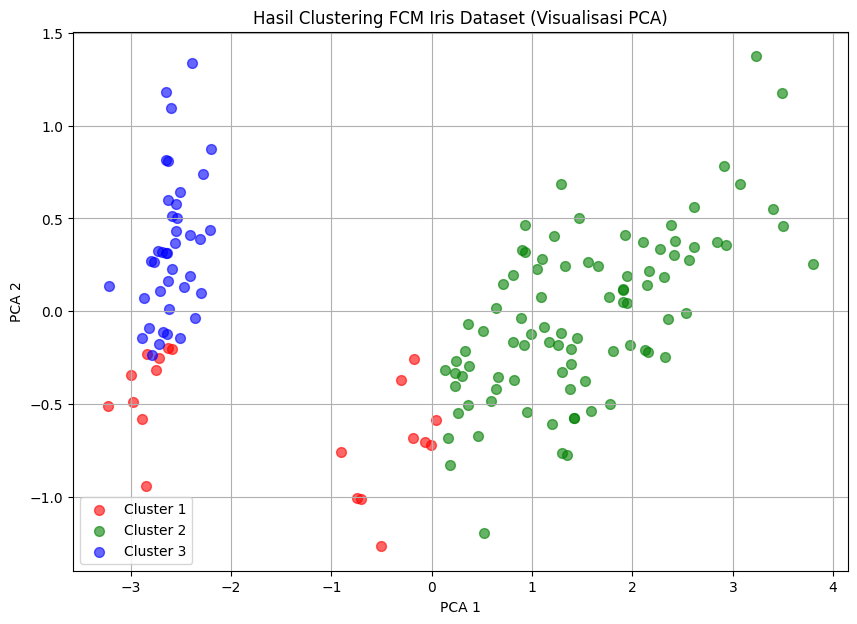

In [ ]:
# Fungsi objektif
def objective_function(X, U, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    J = 0
    for i in range(n):
        for j in range(c):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += (U[i, j] ** m) * (dist ** 2)
    return J

J = objective_function(X, U_new, centroids, m)
print(f"=== Fungsi Objektif (J) Iterasi ke-1 ===\nJ = {J:.4f}")

# Cek konvergensi
epsilon = 0.01
delta = np.linalg.norm(U_new - U)
print(f"\nPerubahan matriks keanggotaan (delta) = {delta:.6f}")

if delta < epsilon:
    print("✅ Matriks keanggotaan sudah konvergen (berhenti iterasi).")
else:
    print("❌ Belum konvergen, lanjut ke iterasi berikutnya.")

# Lakukan PCA untuk mereduksi fitur dari 4 ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tentukan cluster dengan keanggotaan tertinggi tiap data (hard clustering)
cluster_labels = np.argmax(U_new, axis=1)

# Plot data hasil PCA, warna berdasarkan cluster
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']

for i in range(k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i+1}', alpha=0.6, s=50, color=colors[i])

plt.title("Hasil Clustering FCM Iris Dataset (Visualisasi PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()



**Karena dari perhitungan diatas belum mencapai konvergensi maka Akan dilakukan perhitungan ulang pada iterasi hingga mencapai konvergensi**

In [ ]:
# === Fungsi bantu ===
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def calculate_centroids(X, U, m):
    um = U ** m
    centroids = (um.T @ X) / np.sum(um.T, axis=1)[:, None]
    return centroids

def update_membership(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        for j in range(c):
            denom = np.sum((distances[j] / distances) ** (2 / (m - 1)))
            U_new[i, j] = 1 / denom
    return U_new

def objective_function(X, U, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    J = 0
    for i in range(n):
        for j in range(c):
            dist = np.linalg.norm(X[i] - centroids[j])
            J += (U[i, j] ** m) * (dist ** 2)
    return J

# === Load data Iris ===
iris = load_iris()
X = iris.data
n, d = X.shape
k = 3
m = 2
epsilon = 0.01
max_iter = 100
np.random.seed(42)

# Inisialisasi keanggotaan acak (dengan baris = data, kolom = cluster)
U = np.random.dirichlet(np.ones(k), size=n)

# === Iterasi ===
for iteration in range(1, max_iter + 1):
    print(f"\n====== ITERASI KE-{iteration} ======")

    # Hitung centroid
    centroids = calculate_centroids(X, U, m)
    print("\n📌 Centroid:")
    for idx, c in enumerate(centroids):
        print(f"Cluster {idx+1}: {c}")

    # Update keanggotaan
    U_new = update_membership(X, centroids, m)

    print("\n📌 Matriks Keanggotaan (5 data pertama):")
    df_U_new = pd.DataFrame(U_new, columns=[f"C{i+1}" for i in range(k)])
    print(df_U_new.head().to_string(index=False))

    # Hitung fungsi objektif
    J = objective_function(X, U_new, centroids, m)
    print(f"\n📌 Fungsi Objektif (J): {J:.6f}")

    # Cek konvergensi
    delta = np.linalg.norm(U_new - U)
    print(f"📌 Perubahan keanggotaan (delta): {delta:.6f}")
    if delta < epsilon:
        print("\n✅ Konvergensi tercapai. Iterasi dihentikan.")
        break

    U = U_new  # simpan untuk iterasi berikutnya

# === Hasil akhir ===
print("\n======== HASIL AKHIR ========")
print("📌 Centroid akhir:")
for idx, c in enumerate(centroids):
    print(f"Cluster {idx+1}: {c}")

print("\n📌 Keanggotaan akhir (5 data pertama):")
print(df_U_new.head().to_string(index=False))

print(f"\n📌 Fungsi Objektif akhir: {J:.6f}")



====== ITERASI KE-1 ======

📌 Centroid:
Cluster 1: [6.06673919 3.00422155 4.16771426 1.37476747]
Cluster 2: [5.85048499 3.06034261 3.8023977  1.20959388]
Cluster 3: [5.63287974 3.1153372  3.26640646 0.99226272]

📌 Matriks Keanggotaan (5 data pertama):
      C1       C2       C3
0.217205 0.294142 0.488653
0.218217 0.294863 0.486920
0.223350 0.298084 0.478566
0.219065 0.296063 0.484872
0.218886 0.295383 0.485731

📌 Fungsi Objektif (J): 207.462652
📌 Perubahan keanggotaan (delta): 5.720933

====== ITERASI KE-2 ======

📌 Centroid:
Cluster 1: [6.21068093 2.95698086 4.64895615 1.56593278]
Cluster 2: [5.82662119 3.00516876 3.82861947 1.22327775]
Cluster 3: [5.2690505  3.25460263 2.26381149 0.58115577]

📌 Matriks Keanggotaan (5 data pertama):
      C1       C2       C3
0.058691 0.106079 0.835230
0.063467 0.115005 0.821528
0.072616 0.128017 0.799367
0.067576 0.121863 0.810561
0.062521 0.112008 0.825470

📌 Fungsi Objektif (J): 123.393639
📌 Perubahan keanggotaan (delta): 4.076931

====== ITERASI 

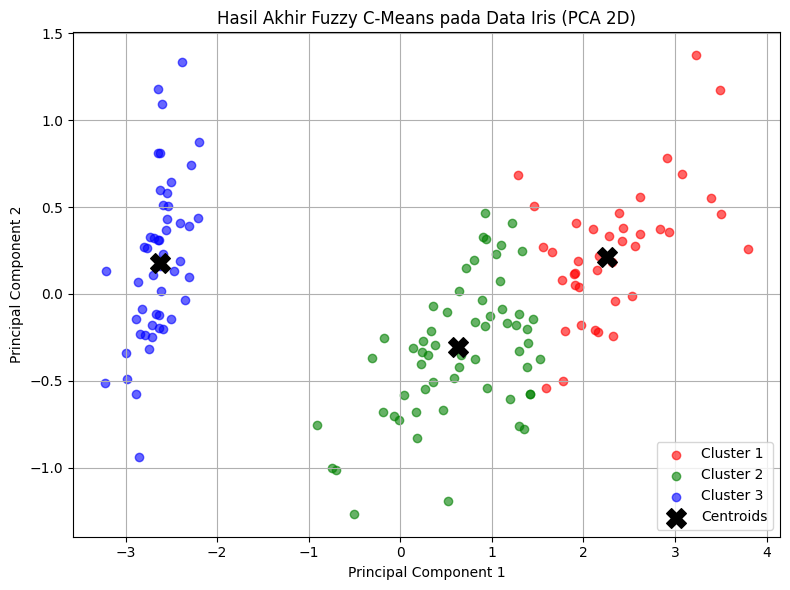

In [ ]:
# Reduksi dimensi data asli ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tentukan label cluster berdasarkan nilai keanggotaan maksimum
labels = np.argmax(U, axis=1)

# Transformasi centroid ke ruang PCA
centroids_pca = pca.transform(centroids)

# Plot data dengan warna berdasarkan cluster
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                color=colors[i], alpha=0.6, label=f'Cluster {i+1}')

# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            color='black', marker='X', s=200, label='Centroids')

plt.title('Hasil Akhir Fuzzy C-Means pada Data Iris (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
